In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.ensemble import GradientBoostingClassifier
import librosa
import os
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import keras

In [13]:
def grid_search(model, param_grid, X_train, y_train, X_val, y_val):
    val_index = [-1]*len(X_train) + [0]*len(X_val)
    gs = GridSearchCV(model, param_grid, refit=True, cv=PredefinedSplit(val_index), n_jobs = -1,scoring='accuracy')
    gs.fit(np.r_[X_train, X_val], np.r_[y_train, y_val])
    return gs

In [15]:
df = pd.read_csv('/kaggle/input/features-manual/features_3_sec_final.csv')
df

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66179,0.335419,0.090920,0.130216,0.003553,1773.168464,168550.931397,1972.748808,117840.090407,...,45.126217,34.097060,47.276480,42.716015,39.442127,36.642020,37.515717,33.613953,43.593520,blues
1,blues.00000.1.wav,66179,0.343382,0.086456,0.112240,0.001472,1819.394632,90842.098987,2014.086527,68063.797587,...,41.949640,29.924103,50.579628,68.859170,65.845390,40.585790,50.657143,98.060720,60.313090,blues
2,blues.00000.2.wav,66179,0.346068,0.092088,0.130903,0.004571,1793.284134,109660.466230,2092.217240,74317.677016,...,40.185673,40.114418,27.060625,50.012370,68.641010,28.436958,44.956963,52.609980,32.879300,blues
3,blues.00000.3.wav,66179,0.363388,0.086984,0.131371,0.002355,1658.544058,110718.095660,1964.485296,81606.479177,...,41.842250,60.600900,34.942368,43.857784,47.895990,30.508402,32.006416,51.278885,31.737726,blues
4,blues.00000.4.wav,66179,0.333218,0.087470,0.142369,0.001710,1633.417701,78307.000551,1951.100894,58963.022352,...,45.452050,46.003597,24.952505,40.714200,30.458221,44.605793,50.638084,26.614265,29.812023,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,rock.00099.5.wav,66179,0.350895,0.081530,0.049631,0.000098,1499.254291,163627.839279,1719.241872,85412.497324,...,43.812220,53.144424,30.162931,80.848860,39.582485,37.179707,30.757494,46.725784,38.432910,rock
9986,rock.00099.6.wav,66179,0.372275,0.082420,0.057613,0.000096,1850.819736,276764.595666,1913.073910,96929.695783,...,42.006542,37.710840,46.777878,34.196507,32.623837,71.080060,54.277637,62.652283,18.596706,rock
9987,rock.00099.7.wav,66179,0.346482,0.087981,0.052045,0.000680,1353.931397,664928.983449,1571.806887,140868.337269,...,34.203000,28.635513,97.818870,41.599854,77.885260,22.745342,25.259607,45.908318,42.537180,rock
9988,rock.00099.8.wav,66179,0.385419,0.083225,0.065870,0.000313,2081.218952,204241.458651,2017.261715,22301.966902,...,24.152521,18.999252,17.899761,20.207003,26.538494,17.655598,22.282140,25.229414,12.778382,rock


In [16]:
import warnings
warnings.filterwarnings('ignore')

import sklearn

def group_division(df):

    data = pd.read_csv('/kaggle/input/gtzan-dataset-music-genre-classification/Data/features_30_sec.csv')
    a = sklearn.utils.shuffle(data,random_state=0)
    a = a.drop(554)

    labels = np.unique(a['label'])
    files = []
    for i in labels:
        for k in range(80):
            for j in range(10):
                files.append((a[a['label']== i].iloc[k]['filename']))

    for i in range(800):
        for j in range(10):
            files[10*i+j] = (files[10*i+j])[:-4] + '.' + str(j) + '.wav'

        #data = pd.read_csv('/kaggle/input/features-manual/features3sec_extended.csv')
    train_val = pd.DataFrame()
    for i in files:
        train_val = pd.concat([train_val,df.loc[df['filename'] == i]])
           #train_val = train_val.append(df.loc[df['filename'] == i])
    test= df.drop(train_val.index)

    b = sklearn.utils.shuffle(train_val,random_state=0)

    files = []
    for i in labels:
        for k in range(60):
            for j in range(10):
                files.append((b[b['label']== i].iloc[k]['filename']))

    for i in range(600):
        for j in range(10):
            files[10*i+j] = (files[10*i+j])[:-6] + '.' + str(j) + '.wav'


    train = pd.DataFrame()
    for i in files:
        train = pd.concat([train,train_val.loc[train_val['filename'] == i]])
    val = df.drop(train.index)
#train
    
    X_tv = train_val.drop(columns=['label','filename','length']); y_tv = train_val['label']
    X_train = train.drop(columns=['label','filename','length']); y_train = train['label']
    X_val = val.drop(columns=['label','filename','length']); y_val = val['label']
    X_test = test.drop(columns=['label','filename','length']); y_test = test['label']
    scaler = StandardScaler(); scaler.fit(X_tv); X_tv_scaled = scaler.transform(X_tv); X_test_scaled = scaler.transform(X_test);
    scaler.fit(X_train); X_train_scaled = scaler.transform(X_train); X_val_scaled = scaler.transform(X_val); 
    
    return X_tv, X_tv_scaled, X_test, X_test_scaled, X_train_scaled, X_val_scaled, y_tv, y_test, y_train, y_val


#X_tv, X_tv_scaled, X_test, X_test_scaled, X_train_scaled, X_val_scaled, y_tv, y_test, y_train, y_val = group_division(df)

In [7]:
enc = OrdinalEncoder()
y_tv_ord = enc.fit_transform(np.array(y_tv).reshape(-1,1));
y_train_ord = enc.fit_transform(np.array(y_train).reshape(-1,1)); y_val_ord = enc.fit_transform(np.array(y_val).reshape(-1,1));
y_test_ord = enc.fit_transform(np.array(y_test).reshape(-1,1)); 

In [17]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [18]:
def plots(history):
  if hasattr(history, 'history'):
    history = history.history
  plt.figure(figsize=(14, 4))
  plt.subplot(1, 2, 1)
  plt.plot(history['loss'], '.-', label='Train loss')
  if 'val_loss' in history.keys():
    plt.plot(history['val_loss'], '.-', label='Val loss')
  plt.xlabel('Epochs');
  plt.legend();
  plt.yscale('log')
  plt.grid(which='both');
  plt.subplot(1, 2, 2)
  plt.plot(history['accuracy'], '.-', label='Train accuracy')
  plt.xlabel('Epochs');
  if 'val_accuracy' in history.keys():
    plt.plot(history['val_accuracy'], '.-', label='Val accuracy')
  plt.legend();
  plt.grid();

In [11]:
lr =2e-4
tf.random.set_seed(0)
MLP = tf.keras.Sequential()
MLP.add(Dense(1000, activation='relu', input_shape=(X_train_scaled.shape[1],)))
MLP.add(Dense(500, activation='relu'))
MLP.add(Dense(200, activation='relu'))
MLP.add(Dropout(0.5))
MLP.add(Dense(10,  activation="sigmoid"))
 
MLP.summary()
MLP.compile(optimizer=Adam(learning_rate=lr,weight_decay=5e-4),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

training_results = MLP.fit(X_train_scaled,y_train_ord, epochs=100, batch_size=128,validation_data=(X_val_scaled, y_val_ord));

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1000)              58000     
                                                                 
 dense_5 (Dense)             (None, 500)               500500    
                                                                 
 dense_6 (Dense)             (None, 200)               100200    
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                2010      
                                                                 
Total params: 660,710
Trainable params: 660,710
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
47/47 [=============================

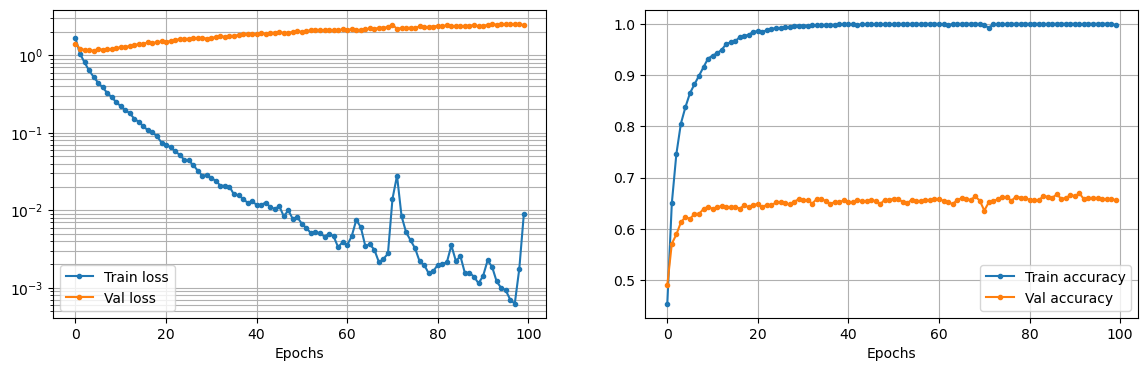

In [12]:
plots(training_results)

In [8]:
df = pd.read_csv('/kaggle/input/features-manual/features3sec_extended.csv')
X_tv, X_tv_scaled, X_test, X_test_scaled, X_train_scaled, X_val_scaled, y_tv, y_test, y_train, y_val = group_division(df)
enc = OrdinalEncoder()
y_tv_ord = enc.fit_transform(np.array(y_tv).reshape(-1,1));
y_train_ord = enc.fit_transform(np.array(y_train).reshape(-1,1)); y_val_ord = enc.fit_transform(np.array(y_val).reshape(-1,1));
y_test_ord = enc.fit_transform(np.array(y_test).reshape(-1,1)); 

In [7]:
lr =2e-4
tf.random.set_seed(0)
MLP = tf.keras.Sequential()
MLP.add(Dense(1000, activation='relu', input_shape=(X_train_scaled.shape[1],)))
MLP.add(Dense(500, activation='relu'))
MLP.add(Dense(200, activation='relu'))
MLP.add(Dropout(0.5))
MLP.add(Dense(10,  activation="sigmoid"))
 
MLP.summary()
MLP.compile(optimizer=Adam(learning_rate=lr,weight_decay=5e-4),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

training_results = MLP.fit(X_train_scaled,y_train_ord, epochs=50, batch_size=128,validation_data=(X_val_scaled, y_val_ord));

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              74000     
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 200)               100200    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                2010      
                                                                 
Total params: 676,710
Trainable params: 676,710
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
47/47 [==============================] 

In [11]:
MLP.save('MLP_extrafeaturesTF',save_format='tf')
import shutil
shutil.make_archive('MLP_extrafeatures', 'zip', '/kaggle/working/')

'/kaggle/working/MLP_extrafeatures.zip'

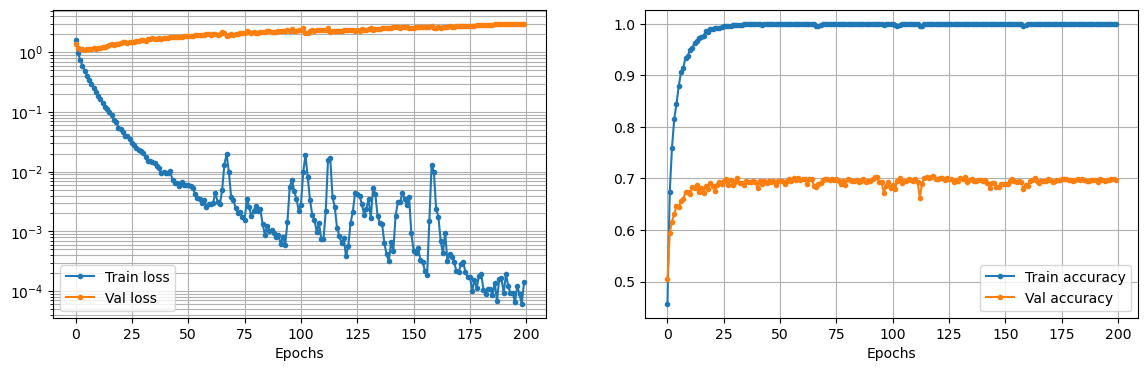

In [15]:
plots(training_results)

In [9]:
MLP.evaluate(X_val_scaled,y_val_ord)
MLP.evaluate(X_test_scaled,y_test_ord)

63/63 [==============================] - 0s 3ms/step - loss: 1.7611 - accuracy: 0.6905


[1.7611072063446045, 0.6904522776603699]

In [12]:
from sklearn.utils import class_weight
class_weigths = class_weight.compute_class_weight(class_weight = 'balanced', classes = np.unique(y_tv),y=(y_tv))
class_weigths = dict(enumerate(class_weigths))

In [19]:
lr =2e-4
tf.random.set_seed(3)
MLP = tf.keras.Sequential()
MLP.add(Dense(1000, activation='relu', input_shape=(X_tv_scaled.shape[1],)))
MLP.add(Dense(500, activation='relu'))
MLP.add(Dense(200, activation='relu'))
MLP.add(Dropout(0.5))
MLP.add(Dense(10,  activation="sigmoid"))
 
MLP.summary()
MLP.compile(optimizer=Adam(learning_rate=lr,weight_decay=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
training_results = MLP.fit(X_tv_scaled,y_tv_ord, epochs=50, batch_size=128);

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1000)              74000     
                                                                 
 dense_9 (Dense)             (None, 500)               500500    
                                                                 
 dense_10 (Dense)            (None, 200)               100200    
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                2010      
                                                                 
Total params: 676,710
Trainable params: 676,710
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
63/63 [==============================

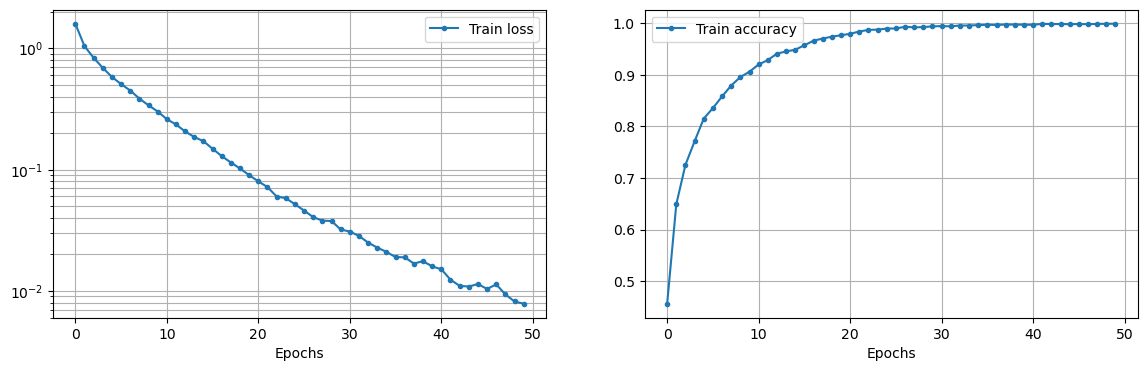

In [18]:
plots(training_results)

In [20]:
MLP.evaluate(X_test_scaled,y_test_ord)

63/63 [==============================] - 0s 2ms/step - loss: 1.2383 - accuracy: 0.7688


[1.2382838726043701, 0.7688442468643188]

#### Desempenho features iniciais (csv) + extra

In [10]:
df = pd.read_csv('/kaggle/input/gtzan-dataset-music-genre-classification/Data/features_3_sec.csv')
df_ex = pd.read_csv('/kaggle/input/features-manual/features3sec_extended.csv')
extra = df_ex.columns[60::]
df[extra] = df_ex[extra]
X_tv, X_tv_scaled, X_test, X_test_scaled, X_train_scaled, X_val_scaled, y_tv, y_test, y_train, y_val = group_division(df)
enc = OrdinalEncoder()
y_tv_ord = enc.fit_transform(np.array(y_tv).reshape(-1,1));
y_train_ord = enc.fit_transform(np.array(y_train).reshape(-1,1)); y_val_ord = enc.fit_transform(np.array(y_val).reshape(-1,1));
y_test_ord = enc.fit_transform(np.array(y_test).reshape(-1,1)); 

In [11]:
lr =2e-4
tf.random.set_seed(0)
MLP = tf.keras.Sequential()
MLP.add(Dense(1000, activation='relu', input_shape=(X_train_scaled.shape[1],)))
MLP.add(Dense(500, activation='relu'))
MLP.add(Dense(200, activation='relu'))
MLP.add(Dropout(0.5))
MLP.add(Dense(10,  activation="sigmoid"))
 
MLP.summary()
MLP.compile(optimizer=Adam(learning_rate=lr,weight_decay=5e-4),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

training_results = MLP.fit(X_train_scaled,y_train_ord, epochs=50, batch_size=128,validation_data=(X_val_scaled, y_val_ord));

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1000)              74000     
                                                                 
 dense_5 (Dense)             (None, 500)               500500    
                                                                 
 dense_6 (Dense)             (None, 200)               100200    
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                2010      
                                                                 
Total params: 676,710
Trainable params: 676,710
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
47/47 [==============================

In [12]:
MLP.evaluate(X_val_scaled,y_val_ord)
MLP.evaluate(X_test_scaled,y_test_ord)

63/63 [==============================] - 0s 2ms/step - loss: 1.6012 - accuracy: 0.6939


[1.6011788845062256, 0.6938877701759338]

In [10]:
lr =2e-4
tf.random.set_seed(8)
MLP = tf.keras.Sequential()
MLP.add(Dense(1000, activation='relu', input_shape=(X_tv_scaled.shape[1],)))
MLP.add(Dense(500, activation='relu'))
MLP.add(Dense(200, activation='relu'))
MLP.add(Dropout(0.5))
MLP.add(Dense(10,  activation="sigmoid"))
 
MLP.summary()
MLP.compile(optimizer=Adam(learning_rate=lr,weight_decay=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
training_results = MLP.fit(X_tv_scaled,y_tv_ord, epochs=50, batch_size=128);

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              74000     
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 200)               100200    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                2010      
                                                                 
Total params: 676,710
Trainable params: 676,710
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
63/63 [==============================] 

In [11]:
MLP.evaluate(X_test_scaled,y_test_ord)

63/63 [==============================] - 0s 2ms/step - loss: 1.1398 - accuracy: 0.7801


[1.139770269393921, 0.7800601124763489]

#### Desempenho manuais + extra + 25 MFCCs

In [19]:
df = pd.read_csv('/kaggle/input/features-manual/features_MFCCS25_extended.csv')
X_tv, X_tv_scaled, X_test, X_test_scaled, X_train_scaled, X_val_scaled, y_tv, y_test, y_train, y_val = group_division(df)
enc = OrdinalEncoder()
y_tv_ord = enc.fit_transform(np.array(y_tv).reshape(-1,1));
y_train_ord = enc.fit_transform(np.array(y_train).reshape(-1,1)); y_val_ord = enc.fit_transform(np.array(y_val).reshape(-1,1));
y_test_ord = enc.fit_transform(np.array(y_test).reshape(-1,1)); 

In [21]:
lr =2e-4
tf.random.set_seed(3)
MLP = tf.keras.Sequential()
MLP.add(Dense(1000, activation='relu', input_shape=(X_tv_scaled.shape[1],)))
MLP.add(Dense(500, activation='relu'))
MLP.add(Dense(200, activation='relu'))
MLP.add(Dropout(0.5))
MLP.add(Dense(10,  activation="sigmoid"))
 
MLP.summary()
MLP.compile(optimizer=Adam(learning_rate=lr,weight_decay=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
training_results = MLP.fit(X_tv_scaled,y_tv_ord, epochs=50, batch_size=128, verbose = True);
MLP.evaluate(X_test_scaled,y_test_ord)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1000)              84000     
                                                                 
 dense_5 (Dense)             (None, 500)               500500    
                                                                 
 dense_6 (Dense)             (None, 200)               100200    
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                2010      
                                                                 
Total params: 686,710
Trainable params: 686,710
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
63/63 [==============================

[1.2543087005615234, 0.7633165717124939]

In [29]:
import os
import pathlib
# Let's say you already have list of files under /kaggle/working directory

files_to_delete = './*.zip' # this considers only ".txt" files. If you want to delete all files, use "./*"
files_list = pathlib.Path(os.getcwd()).glob(files_to_delete)
for file_path in files_list:
    os.remove(file_path)

In [23]:
#MLP.save('MLP_extrafeaturesTF',save_format='tf')
import shutil
shutil.make_archive('MLP_extrafeatures', 'zip', '/kaggle/working/')

'/kaggle/working/MLP_extrafeatures.zip'

### Avaliando as features mais importantes p/ o modelo

In [24]:
#MLP = keras.models.load_model('/kaggle/input/features-manual/MLP_extrafeatures/MLP_extrafeaturesTF')
MLP.evaluate(X_test_scaled, y_test_ord)

63/63 [==============================] - 0s 3ms/step - loss: 1.2543 - accuracy: 0.7633


[1.2543087005615234, 0.7633165717124939]

In [25]:
import shap

In [27]:
explainer = shap.DeepExplainer(MLP,X_tv_scaled)
shap_values = explainer.shap_values(X_test_scaled)

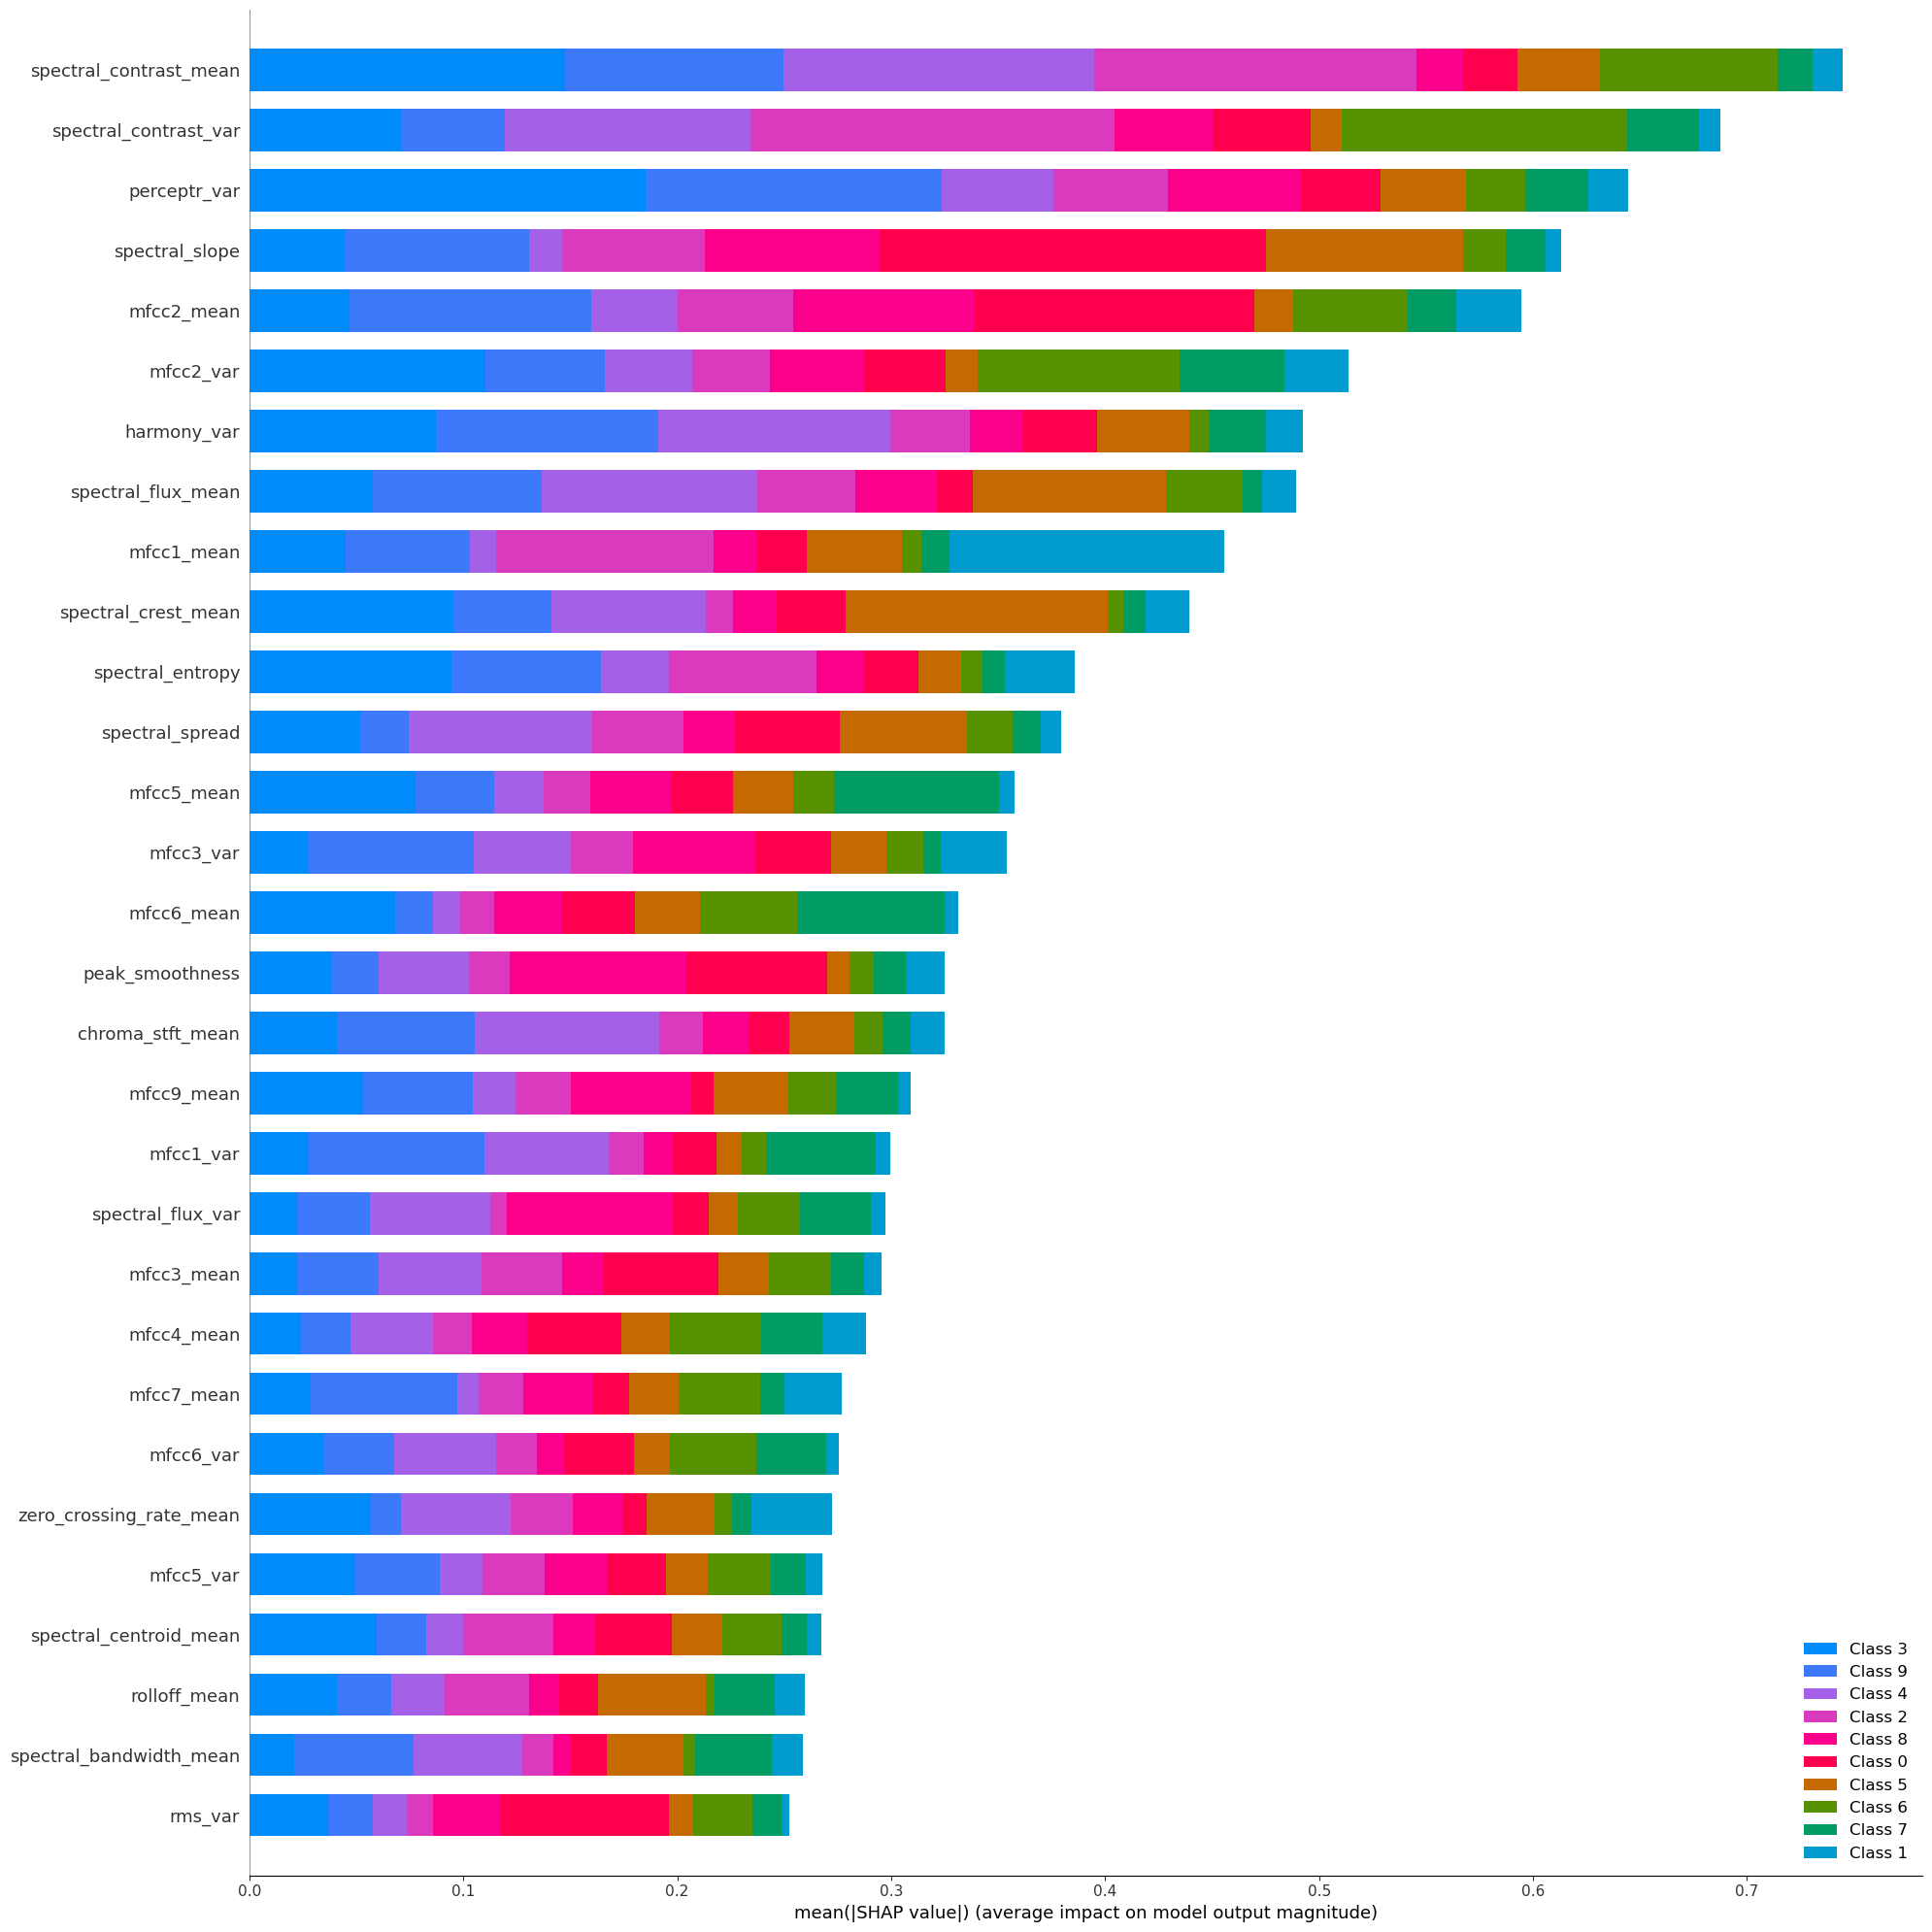

<Figure size 640x480 with 0 Axes>

In [29]:
features = df.columns; features = features.drop(['filename','length','label'])
shap.summary_plot(shap_values,X_test_scaled,feature_names=features, max_display = 30, plot_size = (20,20))
plt.savefig('my_image.png')
plt.show();

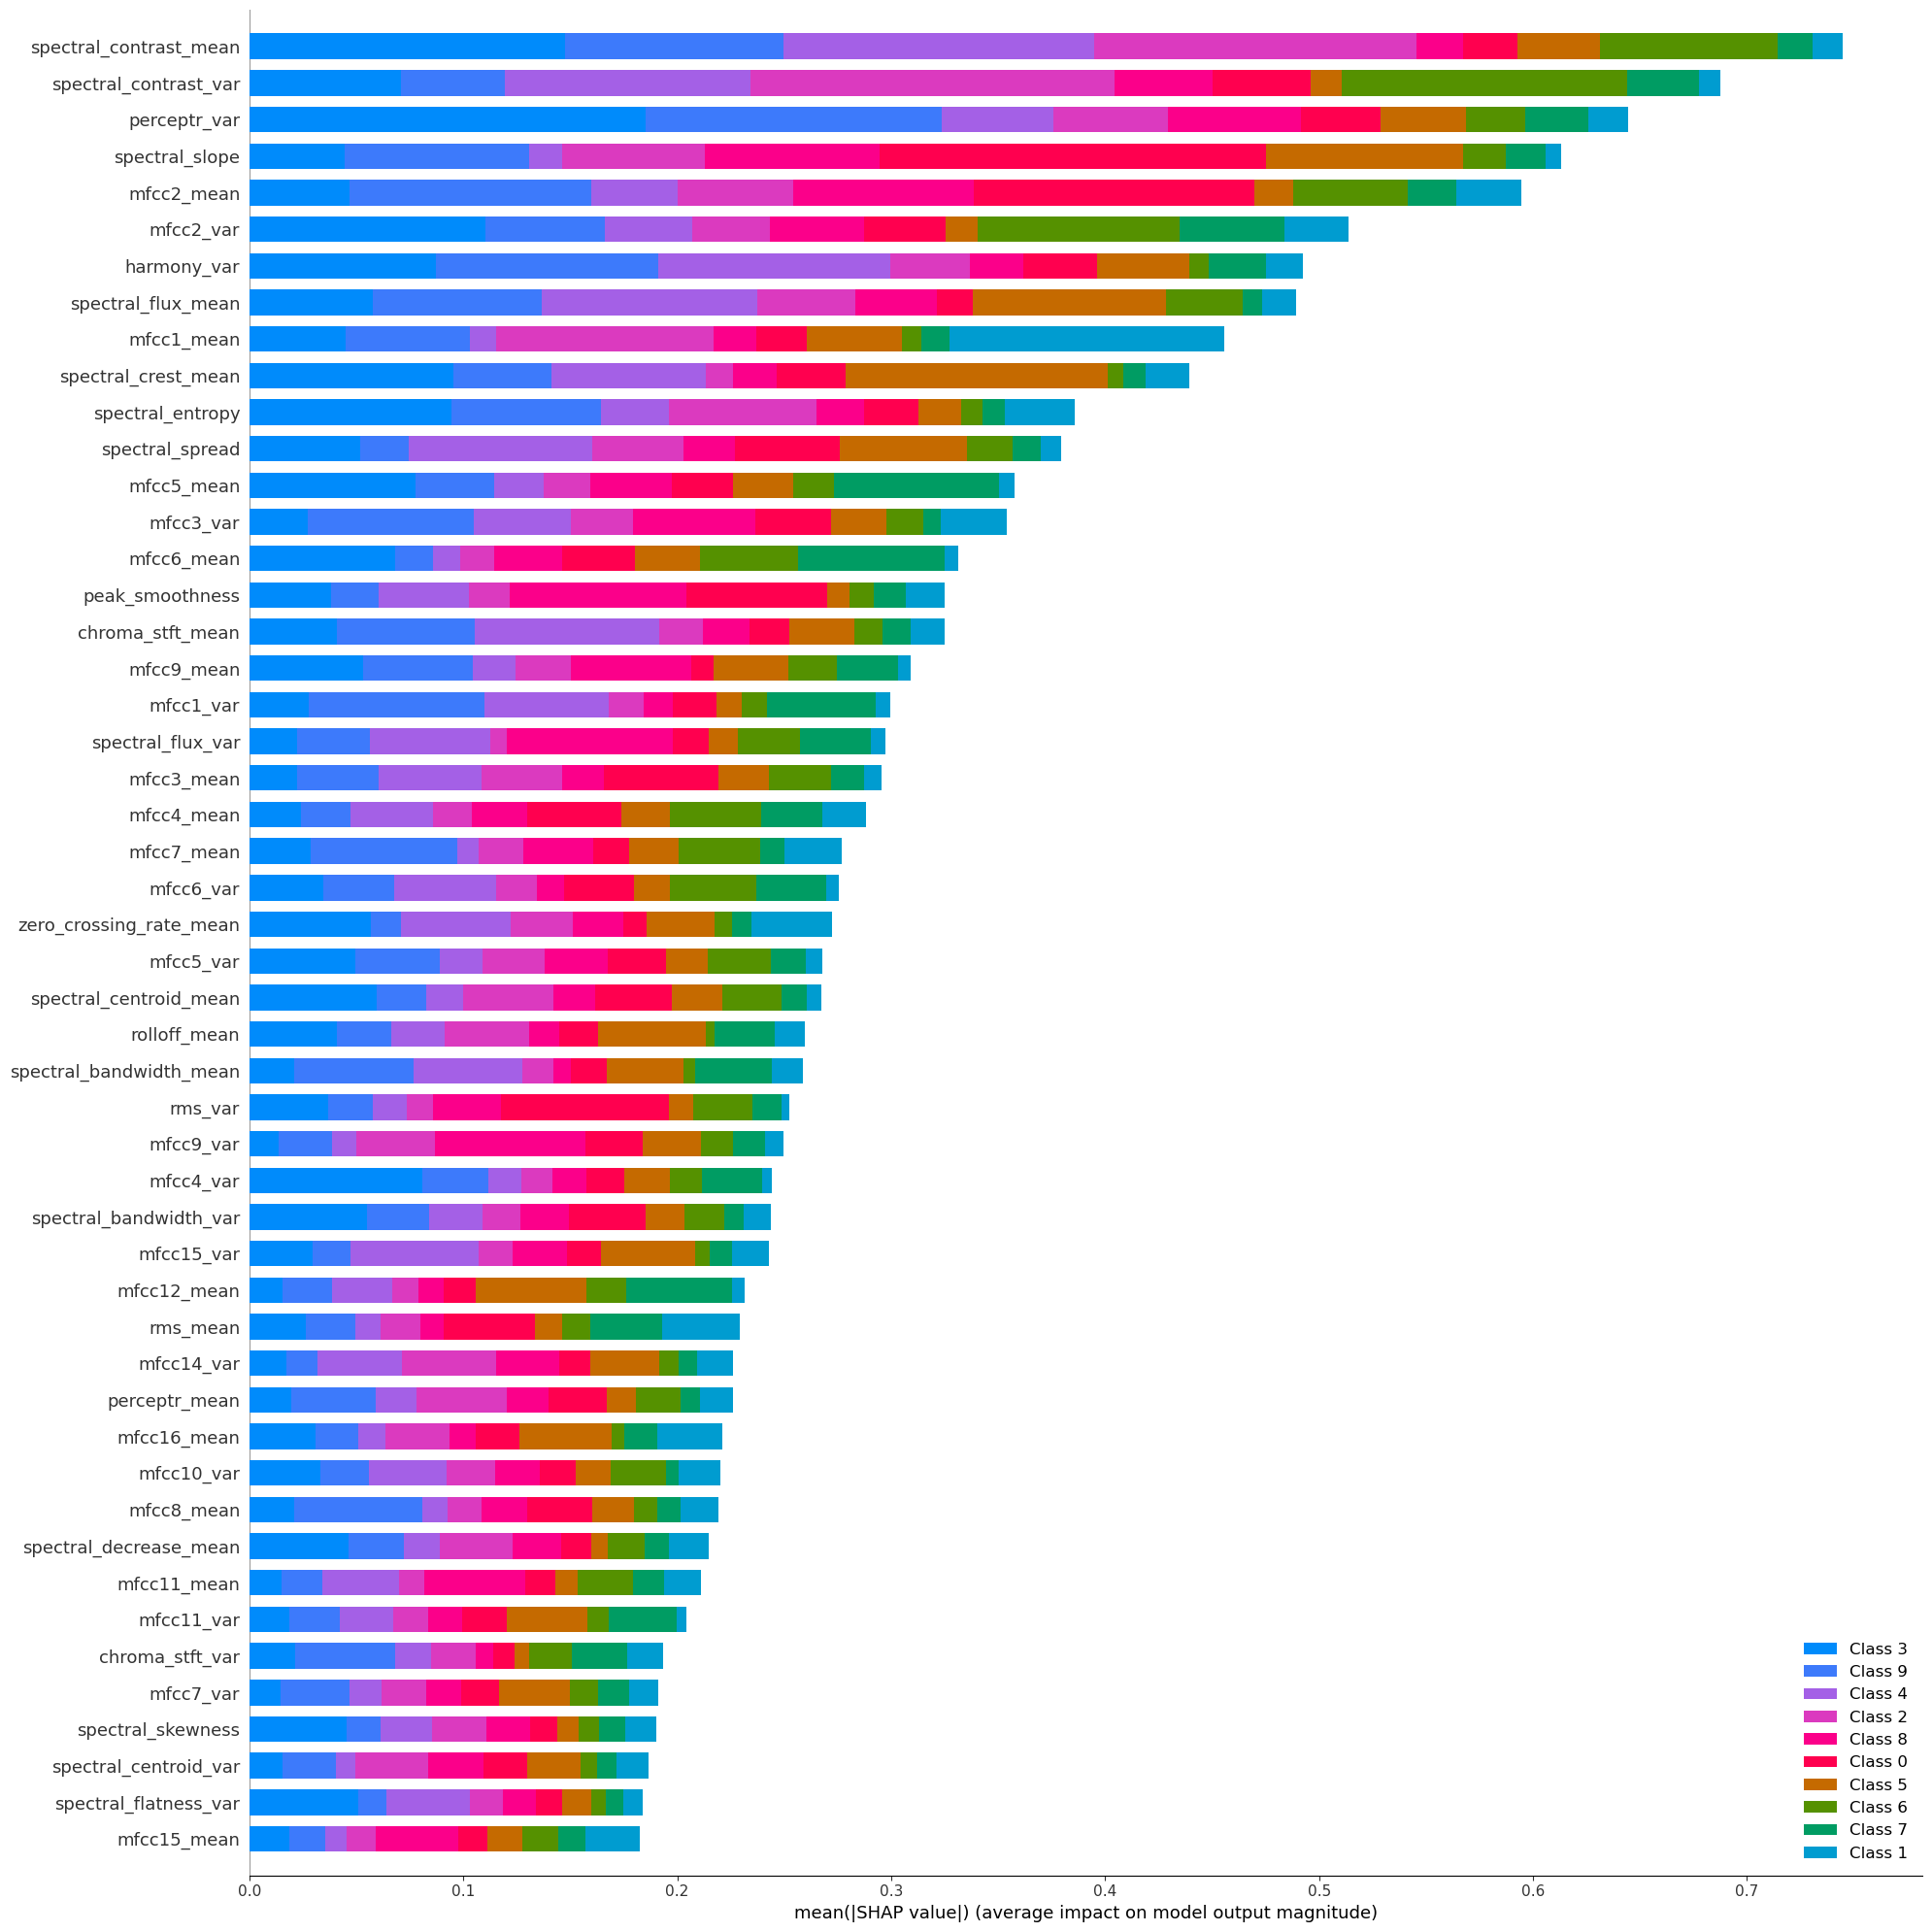

<Figure size 640x480 with 0 Axes>

In [28]:
features = df.columns; features = features.drop(['filename','length','label'])
shap.summary_plot(shap_values,X_test_scaled,feature_names=features, max_display = 50, plot_size = (20,20))
plt.savefig('my_image.png')
plt.show();

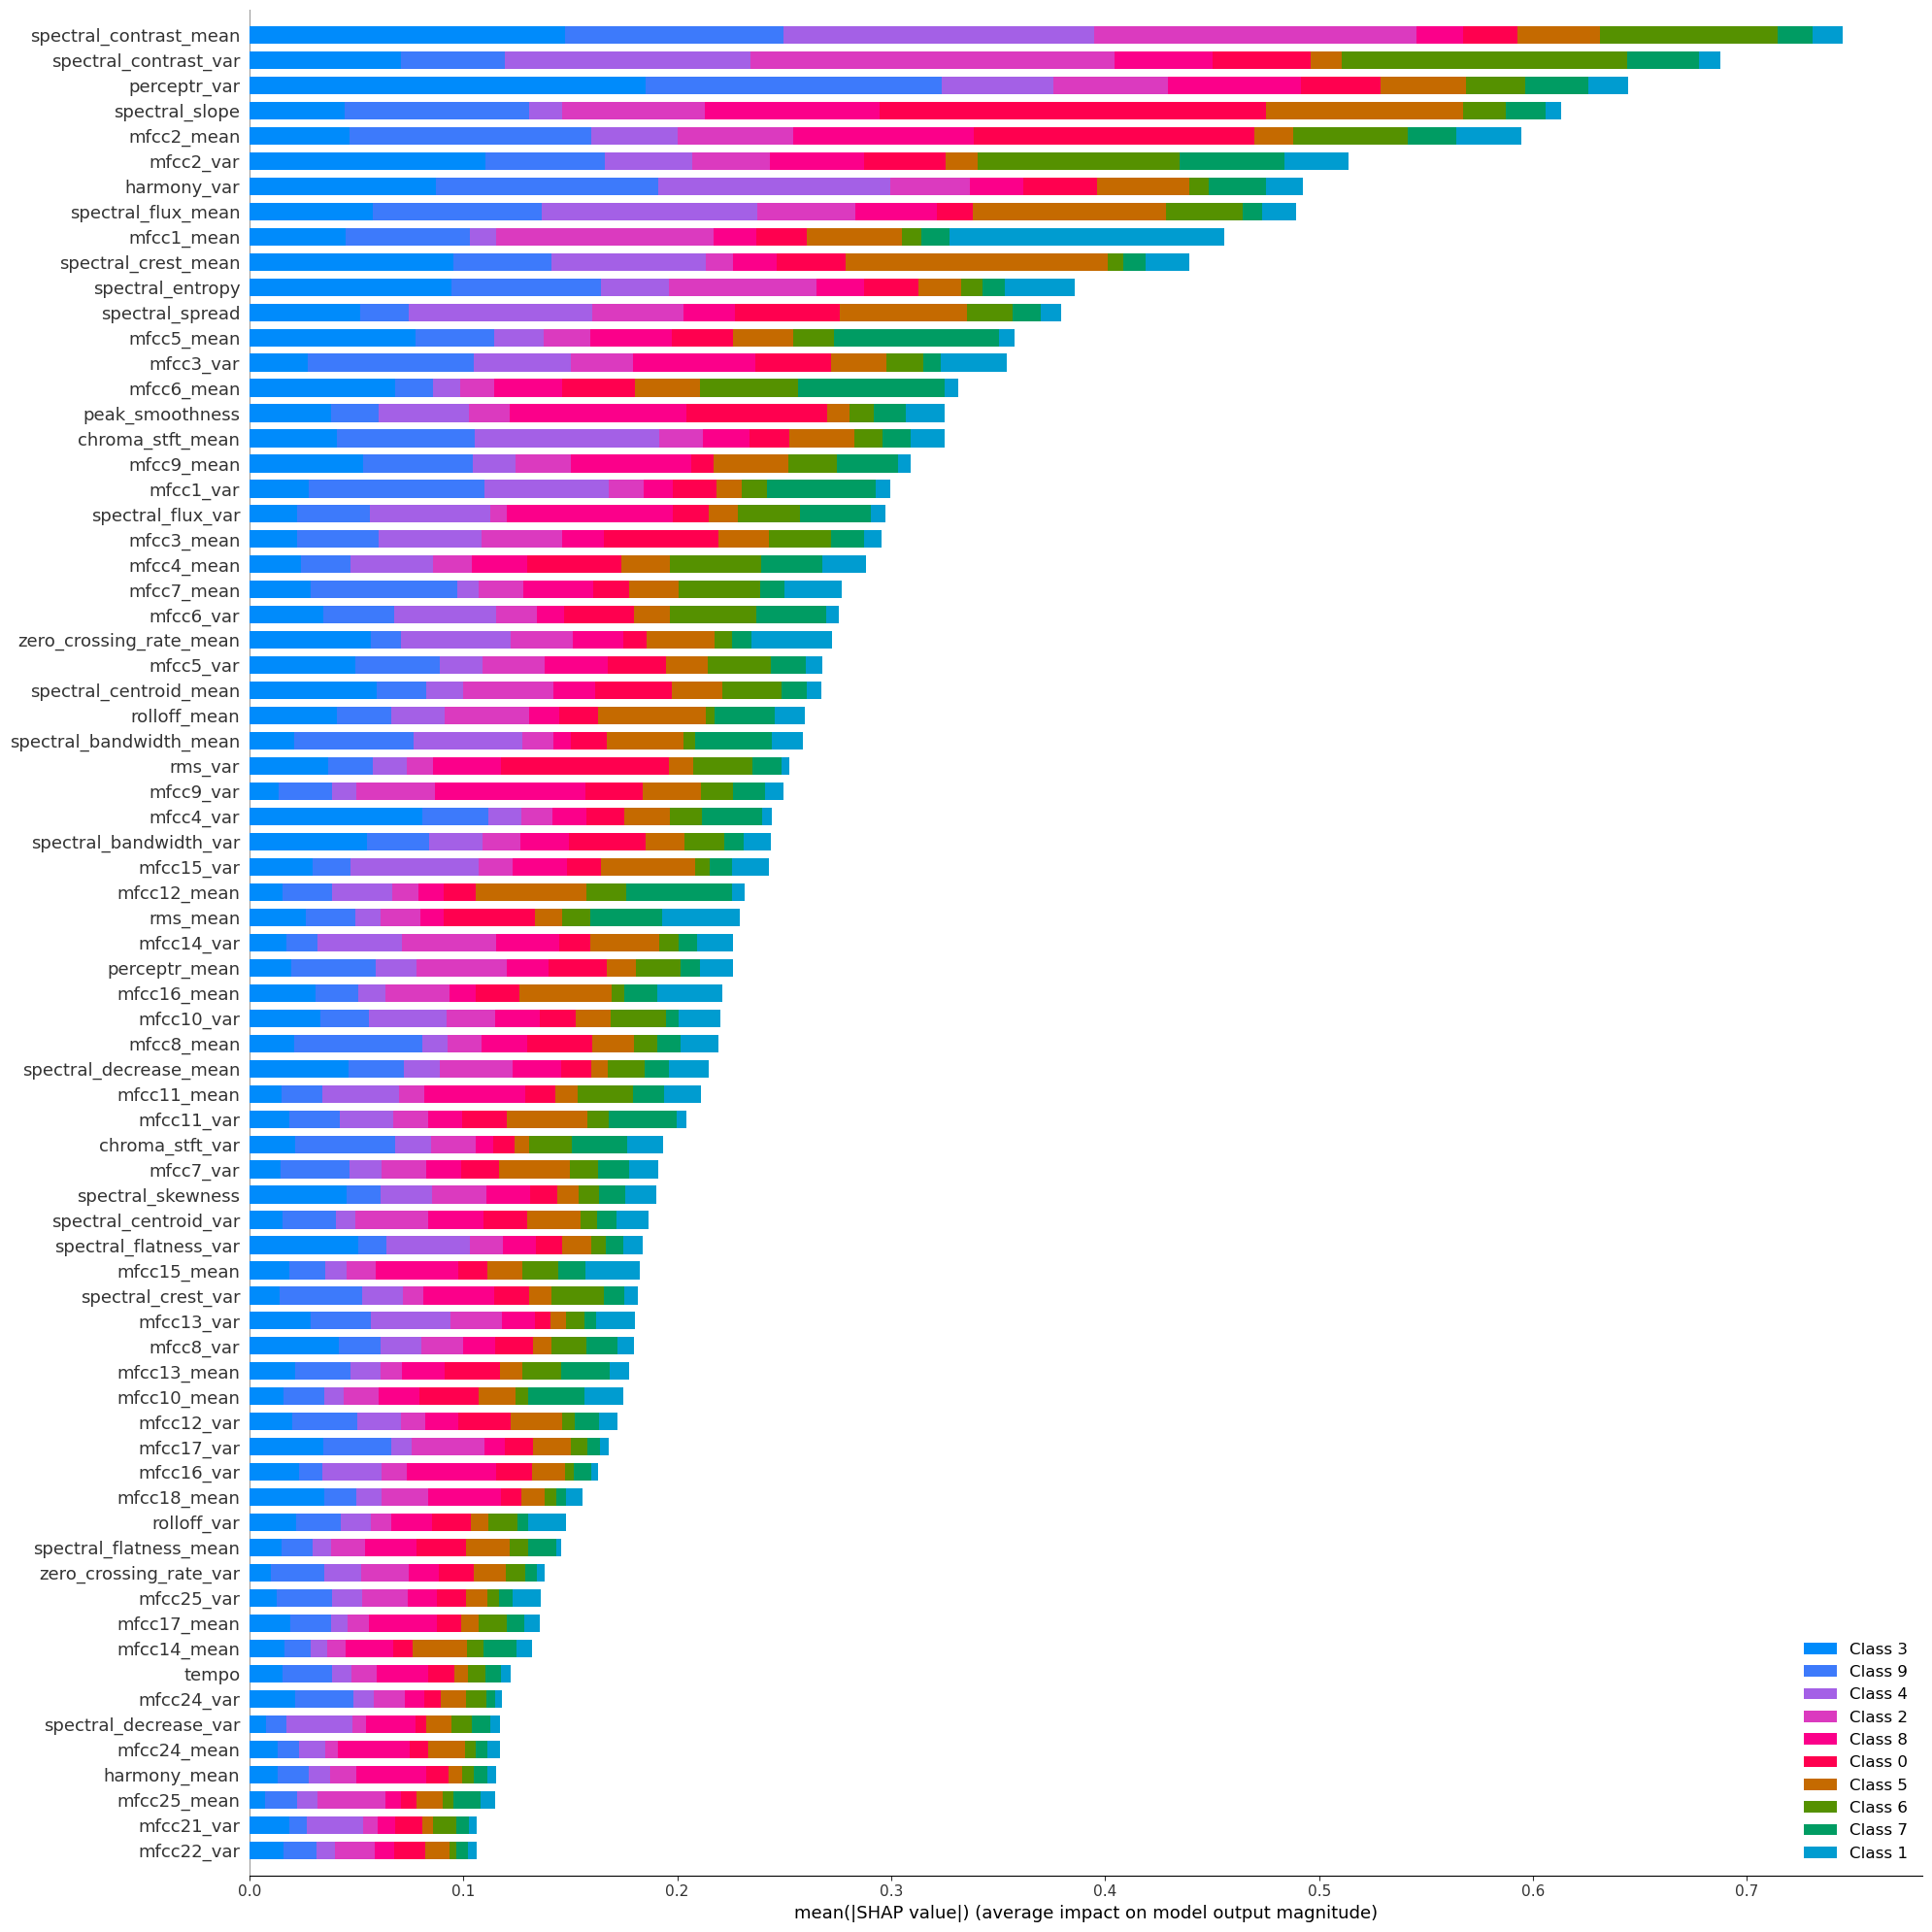

<Figure size 640x480 with 0 Axes>

In [30]:
features = df.columns; features = features.drop(['filename','length','label'])
shap.summary_plot(shap_values,X_test_scaled,feature_names=features, max_display = 73, plot_size = (20,20))
plt.savefig('my_image.png')
plt.show();

In [131]:
df = pd.read_csv('/kaggle/input/features-manual/features3sec_extended.csv')
data = pd.read_csv('/kaggle/input/gtzan-dataset-music-genre-classification/Data/features_30_sec.csv')

In [132]:
a = sklearn.utils.shuffle(data,random_state=0)
a = a.drop(554)

labels = np.unique(a['label'])
files = []
for i in labels:
    for k in range(80):
        for j in range(10):
            files.append((a[a['label']== i].iloc[k]['filename']))

for i in range(800):
    for j in range(10):
        files[10*i+j] = (files[10*i+j])[:-4] + '.' + str(j) + '.wav'

#data = pd.read_csv('/kaggle/input/features-manual/features3sec_extended.csv')
train_val = pd.DataFrame()
for i in files:
    train_val = train_val.append(df.loc[df['filename'] == i])
test= df.drop(train_val.index)

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

In [70]:
Xtv_names = train_val[['filename','label']];  Xtest_names = test[['filename','label']]

In [71]:
Xtv_names[Xtv_names['label'] == 'blues']
#Xtest_names[Xtest_names['label'] == 'blues']

,filename,label
270,blues.00027.0.wav,blues
271,blues.00027.1.wav,blues
272,blues.00027.2.wav,blues
273,blues.00027.3.wav,blues
274,blues.00027.4.wav,blues
...,...,...
435,blues.00043.5.wav,blues
436,blues.00043.6.wav,blues
437,blues.00043.7.wav,blues
438,blues.00043.8.wav,blues


In [78]:
fnames_TRAIN_VAL =[]
for i in range(0,8000,10):
    fnames_TRAIN_VAL.append('/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/' +
                            Xtv_names.iloc[i]['label'] + '/' +   (Xtv_names.iloc[i]['filename'])[:-5]+'wav')
    
#fnames_TRAIN = []; fnames_VAL = []
#for i in range(0,4000,10):
#    fnames_TRAIN.append('/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/' +
#                            Xtrain_names.iloc[i]['label'] + '/' +   (Xtrain_names.iloc[i]['filename'])[:-5]+'wav')
#    fnames_VAL.append('/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/' +
#                            Xval_names.iloc[i]['label'] + '/' +   (Xval_names.iloc[i]['filename'])[:-5]+'wav')

fnames_TEST = [] 
for i in range(0,1990,10):
    fnames_TEST.append('/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/' +
                            Xtest_names.iloc[i]['label'] + '/' +   (Xtest_names.iloc[i]['filename'])[:-5]+'wav')

#fnames_TRAIN_VAL

In [79]:
fTV = pd.DataFrame(fnames_TRAIN_VAL, columns = ['filename'])
#fTRAIN = pd.DataFrame(fnames_TRAIN, columns = ['filename'])
#fVAL = pd.DataFrame(fnames_VAL, columns = ['filename'])
fTEST = pd.DataFrame(fnames_TEST, columns = ['filename'])

In [80]:
fTV.to_csv('/kaggle/working/filesTRAIN_VAL.csv', index = False)
#fTRAIN.to_csv('/kaggle/working/filesTRAIN.csv', index = False)
#fVAL.to_csv('/kaggle/working/filesVAL.csv', index = False)
fTEST.to_csv('/kaggle/working/filesTEST.csv', index = False)

### Data Augmentation

In [81]:
import torch
import torchaudio
import torchaudio.transforms as T
import os

# Load the data
def apply_effect(x,sr):
    # Define effects
    effects = [
        ['gain', '-n'],  # normalises to 0dB
        ["lowpass", "-1", "8000"],  # apply single-pole lowpass filter
        ["contrast", "75"],
        ['pitch', '5'],  # 5 cent pitch shift
        ["speed", "1.05"],  # reduce the speed
        # This only changes sample rate, so it is necessary to
        # add `rate` effect with original sample rate after this.
        ["rate", f"{sample_rate1}"],
        ["reverb", "-w"],  # Reverbration gives some dramatic feeling
        ['echo', '0.8', '0.7', '20', '0.7']

    ]

    # Apply effects
    waveform, sr = torchaudio.sox_effects.apply_effects_tensor(x, sr, effects)
    
    return waveform,sr

    #torchaudio.save('/kaggle/working/test.wav', src = waveform2, sample_rate = sample_rate2)

In [82]:
genres = ['blues','classical','country','disco', 'hiphop', 'jazz', 'metal', 'pop','reggae','rock']
for i in genres:
    os.makedirs('/kaggle/working/DATA_AUG/TRAIN_VAL/'+i)

In [148]:
j=0
for i in fTV['filename']:
    x, sr = torchaudio.load(i)
    y, sr2 = apply_effect(x,sr);
    torchaudio.save('/kaggle/working/DATA_AUG/TRAIN_VAL' + i[75:150], src = y, sample_rate = sr2)
    j=j+1
    print(j)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [149]:
import shutil
import os
shutil.make_archive('/kaggle/working/DATA_AUG_TV', 'zip', '/kaggle/working/DATA_AUG/TRAIN_VAL')

'/kaggle/working/DATA_AUG_TV.zip'

In [150]:
os.chdir('/kaggle/working')
from IPython.display import FileLink
FileLink('DATA_AUG_TV.zip')

/kaggle/working/DATA_AUG_TV.zip

In [154]:
from scipy.fft import fft
from scipy.signal import spectrogram
from scipy.stats import kurtosis
from scipy.stats import linregress
from scipy.stats import skew
from scipy.stats import entropy

nperseg =2048

def extract_features(n_mfcc=20):

    import os
    general_path = '/kaggle/input/data-augmented-gtzan-trainval'
    os.chdir(general_path)

    def compute_features(y,sr,i, folder):
        
        _, _, spectrogram_data = spectrogram(x=y, fs=sr, nperseg=2048)
        spectrogram_data = np.abs(spectrogram_data)  # Take the absolute value of the spectrogram
        power_spectrum = np.mean(spectrogram_data, axis=1)
        normalized_spectrum = power_spectrum / np.sum(power_spectrum)
        frequency_axis = np.fft.rfftfreq(nperseg, 1 / sr)
        log_power_spectrum = np.log10(power_spectrum)
        energy = np.sum(spectrogram_data, axis=1)
        n_frames = energy.shape[0]
        
        spectral_entropy = entropy(normalized_spectrum, base=2)
        spread = np.sqrt(np.sum((frequency_axis[:, np.newaxis] - np.mean(frequency_axis)) ** 2 * power_spectrum[:, np.newaxis]) / np.sum(power_spectrum))
        skewness = skew(power_spectrum)
        slope, _, _, _, _ = linregress(frequency_axis, log_power_spectrum)
        decrease = np.zeros(n_frames)
        for k in range(1, n_frames):
            decrease[k] = np.sum(energy[k:] - energy[k - 1]) / (n_frames - k)
            
        peak_amplitude = np.max(np.abs(y))
        diff = np.diff(y)  # Compute the differences between consecutive samples
        mean_diff = np.mean(np.abs(diff))  # Calculate the mean absolute difference
        smoothness = mean_diff / peak_amplitude

        features=[]     
        features = (file[:-4] +'.' + str(i) + '.wav')
        features = np.append(features,len(y))
        features = np.append(features,np.mean(librosa.feature.chroma_stft(y=y,sr=sr)))
        features = np.append(features,np.var(librosa.feature.chroma_stft(y=y,sr=sr)))
        features = np.append(features, np.mean(librosa.feature.rms(y=y).flatten()))
        features = np.append(features, np.var(librosa.feature.rms(y=y).flatten()))
        features = np.append(features,librosa.feature.spectral_centroid(y=y,sr=sr).mean())
        features = np.append(features,librosa.feature.spectral_centroid(y=y,sr=sr).var())
        features = np.append(features,librosa.feature.spectral_bandwidth(y=y,sr=sr).mean())
        features = np.append(features,librosa.feature.spectral_bandwidth(y=y,sr=sr).var())
        features = np.append(features,librosa.feature.spectral_rolloff(y=y,sr=sr).mean())
        features = np.append(features,librosa.feature.spectral_rolloff(y=y,sr=sr).var())
        features = np.append(features,librosa.feature.zero_crossing_rate(y=y).mean())
        features = np.append(features,librosa.feature.zero_crossing_rate(y=y).var())
        harmony, perceptual = librosa.effects.hpss(y=y)
        features = np.append(features,harmony.mean()); features = np.append(features,harmony.var())
        features = np.append(features,perceptual.mean()); features = np.append(features,perceptual.var())
        tempo, beats = librosa.beat.beat_track(y=y,sr=sr); features = np.append(features,tempo)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        features = np.append(features,np.mean(mfccs,axis=1).reshape(-1,1))
        features = np.append(features,np.var(mfccs,axis=1).reshape(-1,1))
        
        contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
        features = np.append(features,np.mean(contrast)); features = np.append(features,np.var(contrast)) #spectral contrast mean + var
        stft = librosa.stft(y=y);  magnitude = np.abs(stft); flux = librosa.onset.onset_strength(S=magnitude,sr=sr); 
        features = np.append(features, np.mean(flux)); features = np.append(features,np.var(flux)) #spectral flux mean + var
        crest = np.max(magnitude, axis=0) / (np.sum(magnitude, axis=0) + 1e-10)
        features = np.append(features, np.mean(crest)); features = np.append(features, np.var(crest)) #spectral crest mean + var
        flatness = librosa.feature.spectral_flatness(y=y)
        features = np.append(features, np.mean(flatness)); features = np.append(features, np.var(flatness)) #spectral flatness mean + var
        features = np.append(features, np.mean(decrease)); features = np.append(features, np.var(decrease)) #spectral decrease mean + var
        features = np.append(features, slope); #spectral slope 
        features = np.append(features, skewness); #spectral skewness
        features = np.append(features, spread); #spectral spread 
        features = np.append(features, spectral_entropy); #spectral entropy 
        features = np.append(features, np.var(spectrogram_data)); # spectral variability 
        features = np.append(features, smoothness); # peak smoothness
    
        features= np.append(features,folder)
    
        return features

    def read_file(file_path):
        y, sr = librosa.load(file_path)

        return y,sr

    path = np.sort(os.listdir());
    names=[]; labels = []

    test = np.empty((1,76)); j=0
     # iterate through all file
    for folder in path:
        # Check whether file is in text format or not
        os.chdir(general_path+'/'+folder)
        for file in np.sort(os.listdir()):
            if file.endswith(".wav") and file != 'jazz.00054.wav':
                file_path = f"{general_path}/{folder}/{file}"
                
                y,sr = read_file(file_path)
                leny=len(y)
                winlen = int(np.floor(leny/10))
                if leny > winlen*10:
                    offset = leny-winlen*10
                else:
                    offset = 0
                
                for i in range(10):
                    window = y[winlen*i +offset:winlen*(i+1)+offset]
                    test = np.vstack((test,compute_features(window,sr,i,folder)))
    
                j=j+1
                
                print("file number: {}".format(j))
    
    print('Extraction complete, now saving into a DataFrame. ')
    
    columns = []
   
        
    columns.extend(['filename','length','chroma_stft_mean', 'chroma_stft_var','rms_mean','rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var',
                                   'rolloff_mean','rolloff_var','zero_crossing_rate_mean','zero_crossing_rate_var', 'harmony_mean','harmony_var', 'perceptr_mean','perceptr_var', 'tempo'])
    
    for i in range(n_mfcc):
        columns.append('mfcc' + str(i+1) + '_mean')
        columns.append('mfcc' + str(i+1) + '_var')
    
    columns.extend(['spectral_contrast_mean', 'spectral_contrast_var','spectral_flux_mean','spectral_flux_var','spectral_crest_mean','spectral_crest_var',
                    'spectral_flatness_mean','spectral_flatness_var','spectral_decrease_mean','spectral_decrease_var', 'spectral_slope', 'spectral_skewness',
                   'spectral_spread', 'spectral_entropy','spectral_variability','peak_smoothness'])
        
    columns.append('label')
    
    features = pd.DataFrame(test, columns = columns)
    features = features.drop(index=0)
    features= features.reset_index()
    features = features.drop(columns='index')
      
    return features,test


In [155]:
features, test = extract_features()

file number: 1
file number: 2
file number: 3
file number: 4
file number: 5
file number: 6
file number: 7
file number: 8
file number: 9
file number: 10
file number: 11
file number: 12
file number: 13
file number: 14
file number: 15
file number: 16
file number: 17
file number: 18
file number: 19
file number: 20
file number: 21
file number: 22
file number: 23
file number: 24
file number: 25
file number: 26
file number: 27
file number: 28
file number: 29
file number: 30
file number: 31
file number: 32
file number: 33
file number: 34
file number: 35
file number: 36
file number: 37
file number: 38
file number: 39
file number: 40
file number: 41
file number: 42
file number: 43
file number: 44
file number: 45
file number: 46
file number: 47
file number: 48
file number: 49
file number: 50
file number: 51
file number: 52
file number: 53
file number: 54
file number: 55
file number: 56
file number: 57
file number: 58
file number: 59
file number: 60
file number: 61
file number: 62
file number: 63
f

Trying to estimate tuning from empty frequency set.


file number: 299
file number: 300
file number: 301
file number: 302
file number: 303
file number: 304
file number: 305
file number: 306
file number: 307
file number: 308
file number: 309
file number: 310
file number: 311
file number: 312
file number: 313
file number: 314
file number: 315
file number: 316
file number: 317
file number: 318
file number: 319
file number: 320
file number: 321
file number: 322
file number: 323
file number: 324
file number: 325
file number: 326
file number: 327
file number: 328
file number: 329
file number: 330
file number: 331
file number: 332
file number: 333
file number: 334
file number: 335
file number: 336
file number: 337
file number: 338
file number: 339
file number: 340
file number: 341
file number: 342
file number: 343
file number: 344
file number: 345
file number: 346
file number: 347
file number: 348
file number: 349
file number: 350
file number: 351
file number: 352
file number: 353
file number: 354
file number: 355
file number: 356
file number: 3

In [162]:
features.to_csv('/kaggle/working/features_DATA_AUGMENTED.csv', index = False)

In [161]:
features

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,spectral_flatness_var,spectral_decrease_mean,spectral_decrease_var,spectral_slope,spectral_skewness,spectral_spread,spectral_entropy,spectral_variability,peak_smoothness,label
0,blues.00000.0.wav,63072,0.3463606,0.0874348,0.066192,0.00041598026,1427.0730205501472,70100.33582777558,1733.6445343484409,112277.18729171525,...,8.037668e-06,-1.4522769256923392e-05,6.234149847920642e-09,-0.0005124122738178927,10.363619811705995,5002.192953906019,6.160923494968738,2.7205484e-11,0.03656455,blues
1,blues.00000.1.wav,63072,0.42937335,0.072014,0.06044999,0.00023869803,1471.43157529384,91178.61124923948,1809.1515637050707,103343.66994749711,...,2.3497869e-05,-1.1934683051133927e-05,8.063447345368454e-09,-0.0005150805187191505,18.6678959188675,5100.8537432159,5.806237482718937,2.7181092e-11,0.03533269,blues
2,blues.00000.2.wav,63072,0.3535297,0.085449,0.06293386,0.0002529827,1415.5866227968756,77180.68498439438,1840.1159558382851,63766.56778664982,...,3.1135648e-06,-1.3008089757167984e-05,9.04132854417183e-09,-0.0005052756868205215,12.23269981857915,5144.334366869916,5.418620920412529,2.5309298e-11,0.029553818,blues
3,blues.00000.3.wav,63072,0.41033754,0.08086475,0.06910633,0.00018927854,1309.1255467809797,65587.62289062665,1686.390493328942,78055.60314438576,...,2.7160952e-06,-1.5128605901541145e-05,8.631024934161713e-09,-0.0005283584040068515,14.835263470799774,5058.059610833936,6.000756740150808,2.3672626e-11,0.036881622,blues
4,blues.00000.4.wav,63072,0.40572488,0.08535411,0.07589667,0.00021336289,1298.2371169751234,53925.229297202495,1690.6358865367336,60445.93002741133,...,2.0975929e-06,-1.829974558720983e-05,1.624475259948968e-08,-0.0005337465081892862,15.36871175226923,5095.845319607991,5.718373610184939,4.618929e-11,0.030404877,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,rock.00099.5.wav,63072,0.33081585,0.085100785,0.039973788,0.00014082782,1323.2783280509254,111150.84985565986,1573.6343143102893,85855.44005385487,...,1.8158792e-06,-5.325763973645254e-06,2.0074027484629197e-09,-0.0005789776913775648,15.187202714284377,5068.366742909521,5.261167707859912,4.602908e-12,0.03450246,rock
7996,rock.00099.6.wav,63072,0.30270436,0.07893343,0.04179885,8.932077e-05,1685.199161812333,218632.3002337978,1750.336011892861,112860.4007803452,...,7.541154e-05,-5.425972894318882e-06,8.853765857232735e-10,-0.0005077422575561607,8.881410543618978,4797.135753848047,6.157231371420016,3.2729184e-12,0.04769805,rock
7997,rock.00099.7.wav,63072,0.33965454,0.07988187,0.031515706,0.00022416019,1298.028519805874,516476.1497339073,1511.4237868803984,160311.2567079791,...,1.8956807e-05,-3.5189524957573964e-06,5.946836225831153e-10,-0.0004872544314630301,14.556191342509056,4700.004915592802,6.041346709546241,1.4006923e-12,0.039490685,rock
7998,rock.00099.8.wav,63072,0.31832424,0.08093588,0.047868125,0.00012303257,1865.1925366538187,156398.21570429526,1918.6222565119297,37078.414799025966,...,1.2091285e-05,-7.063048316662182e-06,3.1502744007381213e-09,-0.0005057855378025829,15.7018448804214,4765.842270651868,5.8037368549753925,5.574032e-12,0.060519602,rock


In [55]:
df_ex = pd.read_csv('/kaggle/input/data-augmented-gtzan-trainval/features_DATA_AUGMENTED.csv')
df = pd.read_csv('/kaggle/input/features-manual/features3sec_extended.csv')

In [63]:
import warnings
warnings.filterwarnings('ignore')

import sklearn

data = pd.read_csv('/kaggle/input/gtzan-dataset-music-genre-classification/Data/features_30_sec.csv')
a = sklearn.utils.shuffle(data,random_state=0)
a = a.drop(554)

labels = np.unique(a['label'])
files = []
for i in labels:
    for k in range(80):
        for j in range(10):
            files.append((a[a['label']== i].iloc[k]['filename']))

for i in range(800):
    for j in range(10):
        files[10*i+j] = (files[10*i+j])[:-4] + '.' + str(j) + '.wav'

        #data = pd.read_csv('/kaggle/input/features-manual/features3sec_extended.csv')
train_val = pd.DataFrame()
for i in files:
    train_val = pd.concat([train_val,df.loc[df['filename'] == i]])
           #train_val = train_val.append(df.loc[df['filename'] == i])
test= df.drop(train_val.index)
b = sklearn.utils.shuffle(train_val,random_state=0)

files = []
for i in labels:
    for k in range(60):
        for j in range(10):
            files.append((b[b['label']== i].iloc[k]['filename']))

for i in range(600):
    for j in range(10):
        files[10*i+j] = (files[10*i+j])[:-6] + '.' + str(j) + '.wav'


train = pd.DataFrame()
for i in files:
    train = pd.concat([train,train_val.loc[train_val['filename'] == i]])
val = df.drop(train.index)

train_val = pd.concat([train_val,df_ex])

#train=pd.concat([train,df_ex.iloc[train.index]])
#val=pd.concat([val,df_ex.iloc[val.index]])
#train_val = pd.concat([train_val,df_ex])
    
#X_tv = train_val.drop(columns=['label','filename','length']); y_tv = train_val['label']
#X_train = train.drop(columns=['label','filename','length']); y_train = train['label']
#X_val = val.drop(columns=['label','filename','length']); y_val = val['label']
#X_test = test.drop(columns=['label','filename','length']); y_test = test['label']
#scaler = StandardScaler(); scaler.fit(X_tv); X_tv_scaled = scaler.transform(X_tv); X_test_scaled = scaler.transform(X_test);
#scaler.fit(X_train); X_train_scaled = scaler.transform(X_train); X_val_scaled = scaler.transform(X_val); 
    
#return X_tv, X_tv_scaled, X_test, X_test_scaled, X_train_scaled, X_val_scaled, y_tv, y_test, y_train, y_val


In [ ]:
#X_tv, X_tv_scaled, X_test, X_test_scaled, X_train_scaled, X_val_scaled, y_tv, y_test, y_train, y_val = group_division(df)

In [93]:
X_tv = train_val.drop(columns=['label','filename','length']); y_tv = train_val['label']
#X_train = train.drop(columns=['label','filename','length']); y_train = train['label']
#X_val = val.drop(columns=['label','filename','length']); y_val = val['label']
X_test = test.drop(columns=['label','filename','length']); y_test = test['label']
scaler = StandardScaler(); scaler.fit(X_tv); X_tv_scaled = scaler.transform(X_tv); X_test_scaled = scaler.transform(X_test);
#scaler.fit(X_train); X_train_scaled = scaler.transform(X_train); X_val_scaled = scaler.transform(X_val); 
enc = OrdinalEncoder()
y_tv_ord = enc.fit_transform(np.array(y_tv).reshape(-1,1));
y_train_ord = enc.fit_transform(np.array(y_train).reshape(-1,1)); y_val_ord = enc.fit_transform(np.array(y_val).reshape(-1,1));
y_test_ord = enc.fit_transform(np.array(y_test).reshape(-1,1)); 

In [95]:
model = SVC(kernel='rbf', max_iter = 50000,random_state=5, C=10, gamma=0.01); model.fit(X_tv_scaled, y_tv)
print(f'Train accuracy: {accuracy_score(y_tv, model.predict(X_tv_scaled)):.1%}')
print(f'Test accuracy (SVM): {accuracy_score(y_test, model.predict(X_test_scaled)):.1%}')

Train accuracy: 98.6%
Test accuracy (SVM): 75.0%


In [96]:
lr =2e-4
tf.random.set_seed(3)
MLP = tf.keras.Sequential()
MLP.add(Dense(1000, activation='relu', input_shape=(X_tv_scaled.shape[1],)))
MLP.add(Dense(500, activation='relu'))
MLP.add(Dense(200, activation='relu'))
MLP.add(Dropout(0.5))
MLP.add(Dense(10,  activation="sigmoid"))
 
MLP.summary()
MLP.compile(optimizer=Adam(learning_rate=lr,weight_decay=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
training_results = MLP.fit(X_tv_scaled,y_tv_ord, epochs=50, batch_size=128);

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1000)              74000     
                                                                 
 dense_13 (Dense)            (None, 500)               500500    
                                                                 
 dense_14 (Dense)            (None, 200)               100200    
                                                                 
 dropout_3 (Dropout)         (None, 200)               0         
                                                                 
 dense_15 (Dense)            (None, 10)                2010      
                                                                 
Total params: 676,710
Trainable params: 676,710
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
125/125 [============================

In [97]:
MLP.evaluate(X_test_scaled,y_test_ord)

63/63 [==============================] - 0s 2ms/step - loss: 1.6961 - accuracy: 0.7347


[1.6961195468902588, 0.7346733808517456]

### Análise das Features mais importantes para o modelo

In [31]:
df = pd.read_csv('/kaggle/input/features-manual/features_MFCCS25_extended.csv')
X_tv, X_tv_scaled, X_test, X_test_scaled, X_train_scaled, X_val_scaled, y_tv, y_test, y_train, y_val = group_division(df)
enc = OrdinalEncoder()
y_tv_ord = enc.fit_transform(np.array(y_tv).reshape(-1,1));
y_train_ord = enc.fit_transform(np.array(y_train).reshape(-1,1)); y_val_ord = enc.fit_transform(np.array(y_val).reshape(-1,1));
y_test_ord = enc.fit_transform(np.array(y_test).reshape(-1,1)); 

In [42]:
f50 = ['spectral_contrast_mean','spectral_contrast_var','perceptr_var', 'spectral_slope','mfcc2_mean',  'mfcc2_var',
                 'harmony_var', 'spectral_flux_mean', 'mfcc1_mean', 'spectral_crest_mean','spectral_entropy','spectral_spread',
                 'mfcc5_mean', 'mfcc3_var','mfcc6_mean', 'peak_smoothness',  'chroma_stft_mean', 'mfcc9_mean', 'mfcc1_var', 
                 'spectral_flux_var' , 'mfcc3_mean', 'mfcc4_mean', 'mfcc7_mean', 'mfcc6_var', 'zero_crossing_rate_mean', 
                 'mfcc5_var', 'spectral_centroid_mean', 'rolloff_mean', 'spectral_bandwidth_mean', 'rms_var',  'mfcc9_var',
                 'mfcc4_var','spectral_bandwidth_var', 'mfcc15_var', 'mfcc12_mean','rms_mean', 'mfcc14_var', 'perceptr_mean',
                 'mfcc16_mean', 'mfcc10_var', 'mfcc8_mean', 'spectral_decrease_mean', 'mfcc11_mean', 'mfcc11_var', 'chroma_stft_var',
                'mfcc7_var', 'spectral_skewness', 'spectral_centroid_var', 'spectral_flatness_var', 'mfcc15_mean']
X_tv_50f = X_tv[f50]
X_test_50f = X_test[f50]
f30 = f50[0:30]; f40 = f50[0:40]
X_tv_30f = X_tv[f30]
X_test_30f = X_test[f30]
X_tv_40f = X_tv[f40]
X_test_40f = X_test[f40]


In [37]:
enc = OrdinalEncoder()
y_tv_ord = enc.fit_transform(np.array(y_tv).reshape(-1,1));
y_train_ord = enc.fit_transform(np.array(y_train).reshape(-1,1)); y_val_ord = enc.fit_transform(np.array(y_val).reshape(-1,1));
y_test_ord = enc.fit_transform(np.array(y_test).reshape(-1,1)); 
sc = StandardScaler()
sc.fit(X_tv_50f); X_tv_50f = sc.transform(X_tv_50f); X_test_50f =  sc.transform(X_test_50f)

In [39]:
lr =2e-4
tf.random.set_seed(3)
MLP = tf.keras.Sequential()
MLP.add(Dense(1000, activation='relu', input_shape=(X_tv_30f.shape[1],)))
MLP.add(Dense(500, activation='relu'))
MLP.add(Dense(200, activation='relu'))
MLP.add(Dropout(0.5))
MLP.add(Dense(10,  activation="sigmoid"))
 
MLP.summary()
MLP.compile(optimizer=Adam(learning_rate=lr,weight_decay=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
training_results = MLP.fit(X_tv_50f,y_tv_ord, epochs=50, batch_size=128);

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 1000)              51000     
                                                                 
 dense_17 (Dense)            (None, 500)               500500    
                                                                 
 dense_18 (Dense)            (None, 200)               100200    
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_19 (Dense)            (None, 10)                2010      
                                                                 
Total params: 653,710
Trainable params: 653,710
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
63/63 [==============================

In [40]:
MLP.evaluate(X_test_50f,y_test_ord)

63/63 [==============================] - 0s 2ms/step - loss: 1.2777 - accuracy: 0.7472


[1.2777161598205566, 0.7472361922264099]

In [41]:
model = SVC(kernel='rbf', max_iter = 50000,random_state=5, C=10, gamma=0.01); model.fit(X_tv_50f, y_tv)
print(f'Train accuracy: {accuracy_score(y_tv, model.predict(X_tv_50f)):.1%}')
print(f'Test accuracy (SVM): {accuracy_score(y_test, model.predict(X_test_50f)):.1%}')

Train accuracy: 98.3%
Test accuracy (SVM): 77.1%


In [43]:
sc = StandardScaler()
sc.fit(X_tv_40f); X_tv_40f = sc.transform(X_tv_40f); X_test_40f =  sc.transform(X_test_40f)
model = SVC(kernel='rbf', max_iter = 50000,random_state=5, C=10, gamma=0.01); model.fit(X_tv_40f, y_tv)
print(f'Train accuracy: {accuracy_score(y_tv, model.predict(X_tv_40f)):.1%}')
print(f'Test accuracy (SVM): {accuracy_score(y_test, model.predict(X_test_40f)):.1%}')

Train accuracy: 96.2%
Test accuracy (SVM): 75.4%


In [44]:
sc = StandardScaler()
sc.fit(X_tv_30f); X_tv_30f = sc.transform(X_tv_30f); X_test_30f =  sc.transform(X_test_30f)
model = SVC(kernel='rbf', max_iter = 50000,random_state=5, C=10, gamma=0.01); model.fit(X_tv_30f, y_tv)
print(f'Train accuracy: {accuracy_score(y_tv, model.predict(X_tv_30f)):.1%}')
print(f'Test accuracy (SVM): {accuracy_score(y_test, model.predict(X_test_30f)):.1%}')

Train accuracy: 90.1%
Test accuracy (SVM): 71.7%
